In [1]:
!pip install split-folders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPool2D,Dense
import splitfolders
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-07-01 20:57:33.538757: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 20:57:33.538918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 20:57:33.704745: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
os.listdir("/kaggle/input/grapevine-leaves-image-dataset")

['Grapevine_Leaves_Image_Dataset']

In [3]:
os.listdir("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset")

['Buzgulu',
 'Ala_Idris',
 'Nazli',
 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt',
 'Dimnit',
 'Ak']

In [4]:
path_main="/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset"
for folder in os.listdir(path_main):
    folder_path=os.path.join(path_main,folder)
    if os.path.isdir(folder_path):
       list_of_elements=os.listdir(os.path.join(path_main,folder))
       print(f"folder:{folder}")
       print(f"number of elements:{len(list_of_elements)}")
       print("*************")
    
    else:
        print(f"{folder_path} is not a directory")

folder:Buzgulu
number of elements:100
*************
folder:Ala_Idris
number of elements:100
*************
folder:Nazli
number of elements:100
*************
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt is not a directory
folder:Dimnit
number of elements:100
*************
folder:Ak
number of elements:100
*************


In [5]:
def plot_imgs(item_dir,num_imgs=25):
    all_item_dirs=os.listdir(item_dir)
    item_files=[os.path.join(item_dir,file) for file in all_item_dirs][:num_imgs]
    
    plt.figure(figsize=(10,10))
    for idx,img_path in enumerate(item_files):
        plt.subplot(5,5,idx+1)
        img=plt.imread(img_path)
        plt.imshow(img)
        
    plt.tight_layout()


In [6]:
path_Ak="/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ak"
path_Ala_Idris="/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Ala_Idris"
path_Buzgulu="/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu"
path_Dimnit="/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Dimnit"
path_Nazli="/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Nazli"

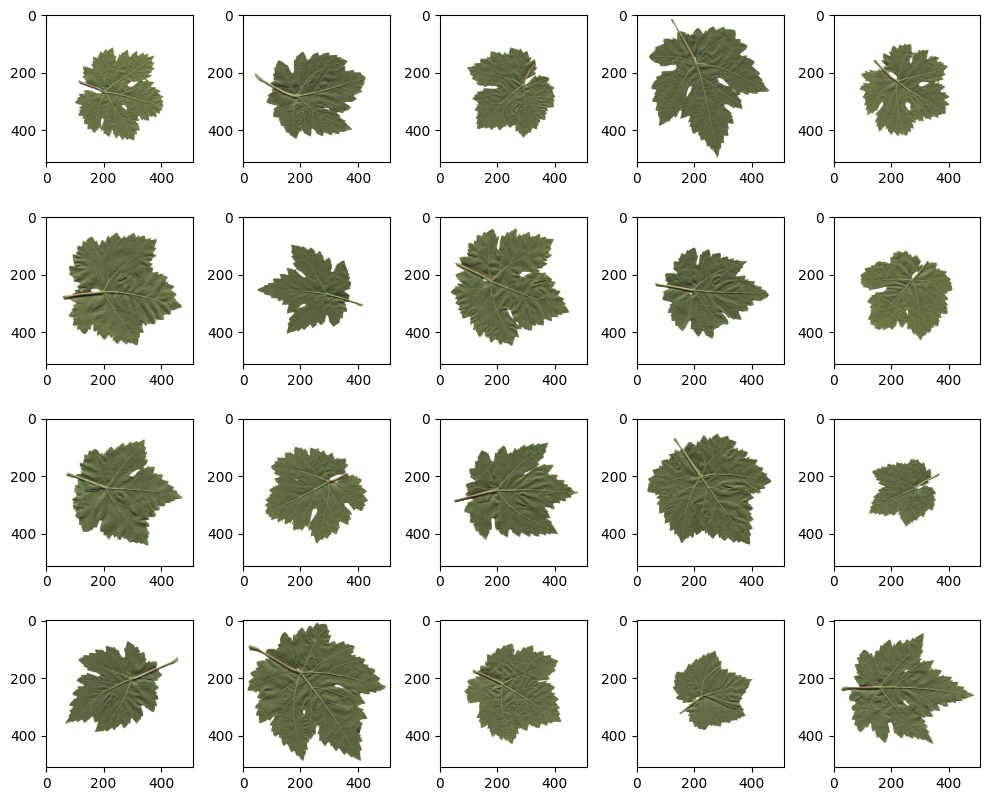

In [7]:
plot_imgs(path_Ak,20)

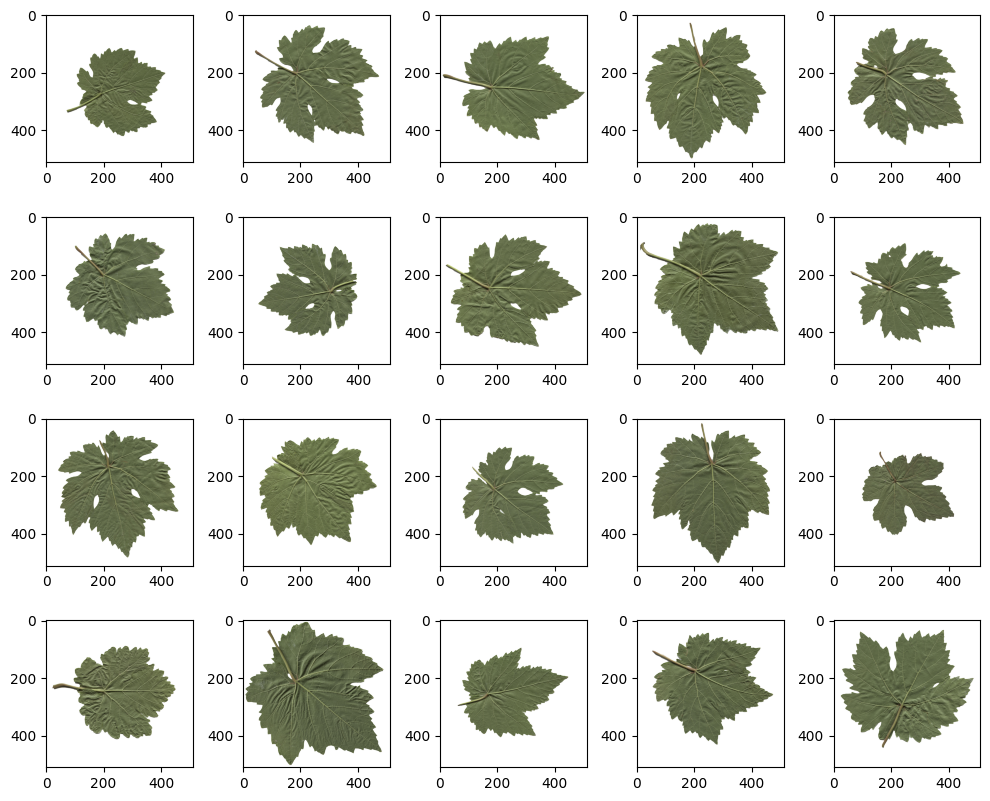

In [8]:
plot_imgs(path_Ala_Idris,20)

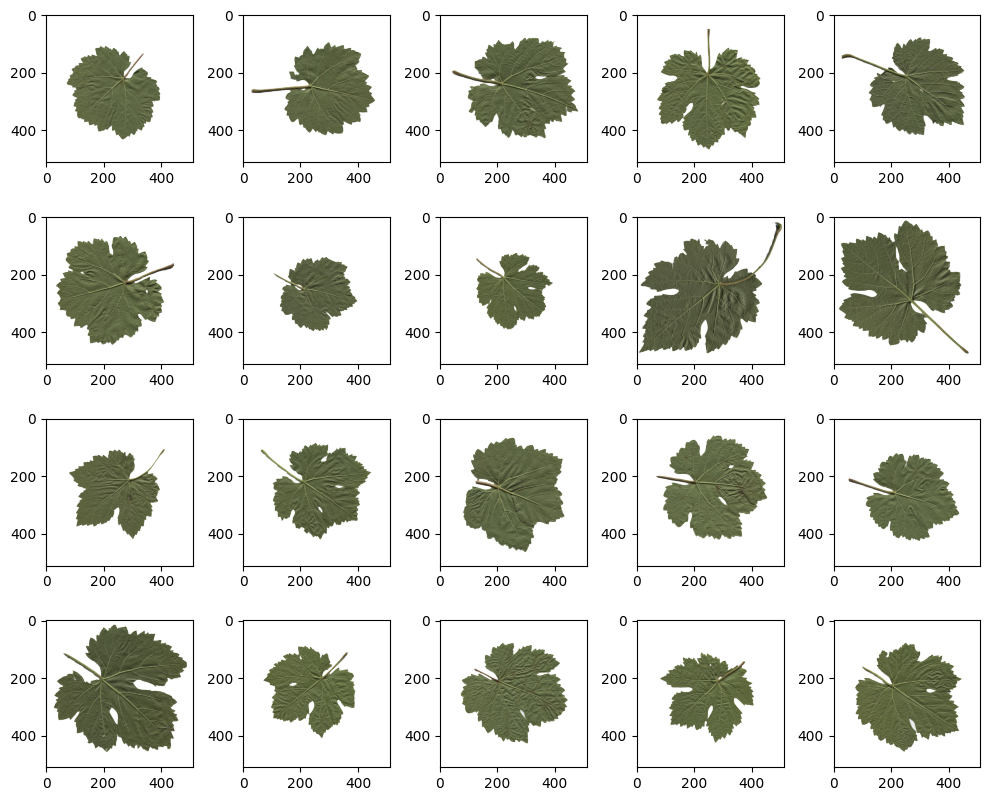

In [9]:
plot_imgs(path_Buzgulu,20)

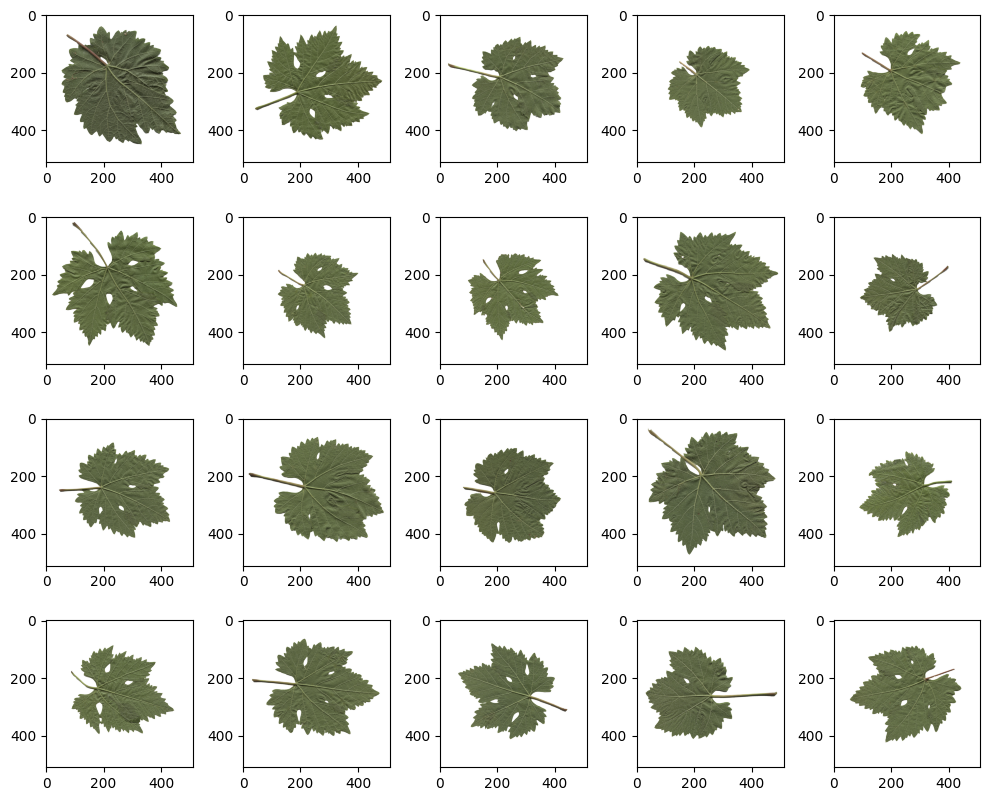

In [10]:
plot_imgs(path_Dimnit,20)

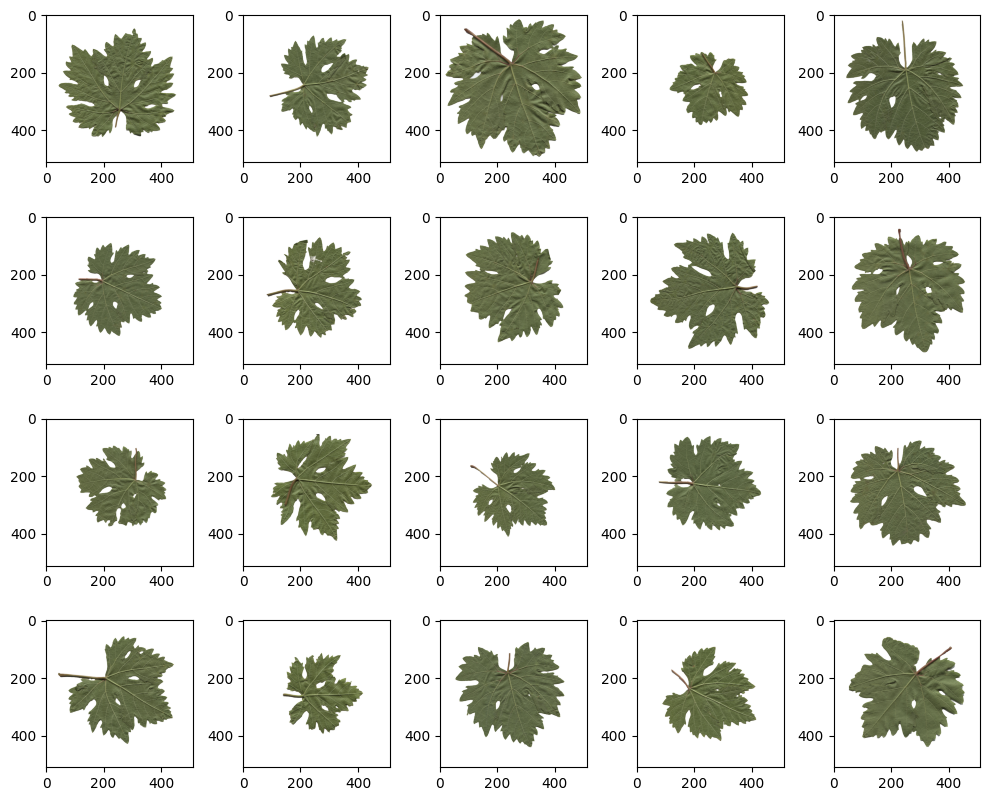

In [11]:
plot_imgs(path_Nazli,20)

In [12]:
splitfolders.ratio("/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset",
                  output="dataset",
                  seed=7,
                  ratio=(0.8,0.1,0.1))

Copying files: 500 files [00:03, 143.52 files/s]


In [13]:
train_datagen=ImageDataGenerator(rescale=1/255)
valid_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [14]:
train=train_datagen.flow_from_directory("dataset/train",
                                       target_size=(200,200),
                                       color_mode="grayscale",
                                       class_mode="categorical",
                                       batch_size=110)
test=test_datagen.flow_from_directory("dataset/test",
                                     target_size=(200,200),
                                     color_mode="grayscale",
                                     class_mode="categorical",
                                     batch_size=110)
valid=valid_datagen.flow_from_directory("dataset/val",
                                       target_size=(200,200),
                                       color_mode="grayscale",
                                       class_mode="categorical",
                                       batch_size=110)

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [15]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=train.image_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(5,activation="softmax"),
    
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
import keras
Metrics=["accuracy",
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall")
        ]
model.compile(optimizer="adam",loss="crossentropy")

In [17]:
model_fit=model.fit(train,validation_data=valid,
                    steps_per_epoch=3,
                   epochs=30)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - loss: 1.8657 - val_loss: 1.6216
Epoch 2/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - loss: 1.6175

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - loss: 1.6175 - val_loss: 1.6246
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - loss: 1.6282 - val_loss: 1.6072
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 439ms/step - loss: 1.6138 - val_loss: 1.6058
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - loss: 1.6014 - val_loss: 1.6147
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - loss: 1.6118 - val_loss: 1.6007
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - loss: 1.5900 - val_loss: 1.6014
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 446ms/step - loss: 1.5795 - val_loss: 1.5958
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - loss: 1.5634 - val_loss: 1.5956
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 554ms/step - loss: 1.5285 - val_loss: 1.5925
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - loss: 1.5242 - val_loss: 1.6304
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 451ms/step - loss: 1.4943 - val_loss: 1.6268
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - loss: 1.4521 - val_loss: 1.6436
Epoch 14/30

In [18]:
pred=model.predict(test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


In [19]:
def evaluate(actual, pred):
  pre = []
  for i in pred:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')
  

In [20]:
labels = []

for key, value in train.class_indices.items():
   labels.append(key)

In [21]:
evaluate(test.classes,pred)

Accuracy: 0.28
Precision: 0.2777777777777778
Recall: 0.27999999999999997
F1_score: 0.27210526315789474
